In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
def fit_NeuralNetwork(X_train,y_train,alpha,hidden_layer_sizes,epochs):
    #Enter implementation here
    d = hidden_layer_sizes[0]
    X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
    N = X_train.shape[0]

    # set weight of all layers
    wAll = [] # use to store weights of all layer
    w1 = []
    # according input to set first layer weights
    for d in range(0,d):
      w1temp = np.random.normal(0, 0.1)
      w1.append(w1temp)

    weight1 = [] # store all weights of input layer to hidden layer
    for a in range(0,X_train.shape[1]):
      weight1.append(w1)

    wAll.append(weight1)
    # according hiddern layer size to set hiddern layer and output layer weights
    for g in range(len(hidden_layer_sizes)-1):
      w = []
      for e in range(0,hidden_layer_sizes[g+1]):
        wtemp = np.random.normal(0, 0.1)
        w.append(wtemp)

      weight = [] # store all weights of each hidden layer
      for b in range(0,hidden_layer_sizes[g]+1):
        weight.append(w)

      wAll.append(weight)

    wLast = [] # store all weights of hidden layer to output layer
    for f in range(0,hidden_layer_sizes[len(hidden_layer_sizes)-1]+1):
      wLasttemp = np.random.normal(0, 0.1)
      wLast.append(wLasttemp)

    wAll.append(wLast)

    errAll = []

    for i in range(epochs):
      errAverge = 0
      choiceArray=np.arange(0, N)
      np.random.shuffle(choiceArray)
      for n in range(0, N):
        index=choiceArray[n]
        x=np.transpose(X_train[index])
        X = []
        S = []
        g = []
        X,S = forwardPropagation(x,wAll) # run forward propagation to get X and S
        g = backPropagation(X,y_train[index],S,wAll) # using X and S got from forward propagation to compute g by back propagation
        wAll = updateWeights(wAll,g,alpha) # update weights by using g which got from back propagation
        xlt = X[len(X)-1] # X_L
        errAverge = errAverge + errorPerSample(xlt,y_train[index])

      errAverge = errAverge/X_train.shape[0]
      errAll.append(errAverge)

    return errAll,wAll


In [ ]:
def forwardPropagation(x, weights):
    #Enter implementation here
    S = [] # store all s during the forward propagation
    X = [] # store all x during the forward propagation
    X.append(x)
    wLast = weights[len(weights)-1] # get the weights from hiddern layer to output layer
    xL = 0

    xCurrent = []
    xCurrent = x # x of current layer
    # compute s and x of each layer
    for g in range(len(weights)-1):
      wCurrent = weights[g] # get the weights from current layer to next layer
      sList = [] # store s which output from dot product
      for i in range(len(wCurrent[0])):
        temps = 0
        for a in range(len(xCurrent)): # sum of x multiply weights to get s
          wtemp = []
          wtemp = wCurrent[a]
          temps = temps + wtemp[i]*xCurrent[a]
        sList.append(temps)
      S.append(sList)

      xList = [] # store x which output from activation function
      for j in range(len(sList)): # using of s for activation function to get x of next layer
        tempx = activation(sList[j])
        xList.append(tempx)
      xCurrent = xList
      X.append(xCurrent)

      xCurrent.insert(0,1) # add augmented vector for x of hidden layer

    # compute s and output X_L
    sLast = np.dot(xCurrent,wLast)
    xL = outputf(sLast)
    S.append(sLast)
    X.append(xL)

    return X,S


In [ ]:
def errorPerSample(X,y_n):
    #Enter implementation here
    err = 0
    err = errorf(X,y_n)

    return err


In [ ]:
def backPropagation(X,y_n,s,weights):
    #Enter implementation here
    sLast = s[len(s)-1]
    sBeforeLast = s[len(s)-2]
    xL = X[len(X)-1] #X_L
    xBeforeLast = X[len(X)-2] # x before the output layer
    wLast = weights[len(weights)-1] # get the weights from hiddern layer to output layer
    dsBeforeLast = 0 # de/ds of x before the output layer
    deltaBeforeLast = [] # backward message of the layer before the output layer
    deltaAll = [] # store backward message of all layers
    gBeforeLast = []
    gfinal = []

    # compute backward message of last layer
    deltaLast = derivativeError(xL,y_n)*derivativeOutput(sLast)

    # individually compute backward message of the layer before the last layer
    # since this layer has different calcultion method for s with other layers
    for a in range(len(sBeforeLast)):
      dedxBeforeLast = deltaLast*wLast[a] # dedx
      dsBeforeLast = derivativeActivation(sBeforeLast[a]) # deds
      tempdeltaBeforeLast = dedxBeforeLast*dsBeforeLast # dedx*deds
      deltaBeforeLast.append(tempdeltaBeforeLast)

    # compute backward message of hidden layers
    currentDelta = []
    currentDelta = deltaBeforeLast
    for g in range(len(weights)-2):
      deltaList = []
      sCurrent = []
      wCurrent = []
      sCurrent = s[len(weights)-2-1-g]
      wCurrent = weights[len(weights)-2-1-g+1]
      for b in range(len(sCurrent)):
        dsCurrent = derivativeActivation(sCurrent[b]) # deds
        dedx1 = 0
        wtemp = wCurrent[b]
        dedx = np.dot(wtemp, currentDelta) # dedx
        tempdelta = dedx*dsCurrent # dedx*deds
        deltaList.append(tempdelta)
      currentDelta = deltaList
      deltaAll.append(currentDelta)

    # compute dedw of each weights of each layer
    dwLast = []
    for e in range(len(xBeforeLast)): # for last layer
      tempdwLast = deltaLast*xBeforeLast[e] # backward messgae mulitply x
      dwLast.append(tempdwLast)
    gfinal.append(dwLast)

    xForThisLayer = X[len(X)-3]
    for d in range(len(xForThisLayer)):
      dwBeforeLast = []
      for e in range(len(deltaBeforeLast)): # for the layer before the last layer
        tempdwBeforeLast = deltaBeforeLast[e]*xForThisLayer[d] # backward messgae mulitply x
        dwBeforeLast.append(tempdwBeforeLast)
      gBeforeLast.append(dwBeforeLast)
    gfinal.append(gBeforeLast)

    for c in range(len(deltaAll)):
      gList = []
      xCurrent = []
      detlaCurrent = []
      xCurrent = X[len(deltaAll)-1-c]
      detlaCurrent = deltaAll[len(deltaAll)-1-c]
      for f in range(len(xCurrent)): # for the general hiddern layers
        dw = []
        for g in range(len(detlaCurrent)):
          tempdw = detlaCurrent[g]*xCurrent[f] # backward messgae mulitply x
          dw.append(tempdw)
        gList.append(dw)
      gfinal.append(gList)

    return gfinal


In [ ]:
def updateWeights(weights,g,alpha):
    #Enter implementation here
    nW = [] # store new weights of all layers

    for f in range(len(weights)):
      wCurrent = weights[f] # get weights of each layers
      gCurent = np.asarray(g[len(weights)-1-f]) # get g of each weights
      for i in range(len(wCurrent)):
        wCurrent[i] = wCurrent[i] - alpha * gCurent[i] # wi = wi - alpha*gi
      nW.append(wCurrent)

    return nW


In [ ]:
def activation(s):
  #Enter implementation here
    output = 0
    if s > 0: # ReLu function
        output = s
    else:
        output = 0

    return output


In [ ]:
def derivativeActivation(s):
    #Enter implementation here
    output = 0
    if s > 0:
        output = 1
    else:
        output = 0

    return output


In [ ]:
def outputf(s):
    #Enter implementation here
    x_L = 0
    x_L = 1/(1+np.exp(-s))

    return x_L


In [ ]:
def derivativeOutput(s):
    #Enter implementation here
    x_L = 0
    x_L = np.exp(-s)/pow(1+np.exp(-s),2)

    return x_L

In [ ]:
def errorf(x_L,y):
    #Enter implementation here
    en = 0

    if y == 1:
        en = -np.log(x_L)
    elif y == -1:
        en = -np.log(1-x_L)

    return en


In [ ]:
def derivativeError(x_L,y):
    #Enter implementation here
    dedx = 0
    if y == 1:
        dedx = -1/x_L
    elif y == -1:
        dedx = 1/(1-x_L)

    return dedx


In [ ]:
def pred(x_n,weights):
    #Enter implementation here
    c = []
    for a in range(x_n.shape[0]):
      X,S = forwardPropagation(x_n[a], weights) # run forward propagation to get X
      yHat = 0
      X_L = X[len(X)-1]
      if X_L < 0.5:
        yHat = -1
      else:
        yHat = 1
      c.append(yHat)

    return c



In [ ]:
def confMatrix(X_train,y_train,w):
    #Enter implementation here
    m = np.ones((2,2))
    TrueNegative = 0
    FalsePositive = 0
    FalseNegative = 0
    TruePositive = 0

    X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
    c = pred(X_train,w)
    for i in range(y_train.shape[0]):
      if c[i] == -1:
        if y_train[i] == -1:
          TrueNegative = TrueNegative + 1
        elif y_train[i] == 1:
          FalsePositive = FalsePositive + 1
      elif c[i] == 1:
        if y_train[i] == -1:
          FalseNegative = FalseNegative + 1
        elif y_train[i] == 1:
          TruePositive = TruePositive + 1

    m[0][0] = TrueNegative
    m[0][1] = FalsePositive
    m[1][0] = FalseNegative
    m[1][1] = TruePositive

    return m



In [ ]:
def plotErr(e,epochs):
    #Enter implementation here
    x = list(range(1,epochs+1))
    y = e

    plt.plot(x,y)
    plt.show


In [ ]:
def test_SciKit(X_train, X_test, Y_train, Y_test):
    #Enter implementation here
    pct = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(30, 10), random_state=1)
    pct.fit(X_train,Y_train)

    pred_pct=pct.predict(X_test)
    print ('Test accuracy: ', pct.score(X_test, Y_test))

    m = confusion_matrix(Y_test,pred_pct)

    pred_pct=pct.predict(X_train)
    print ('Train accuracy: ',pct.score(X_train, Y_train))


    return m


Test accuracy:  0.9
Train accuracy:  0.9625
Confusion Matrix is from Part 1a is:  [[ 6.  1.]
 [ 2. 11.]]
Confusion Matrix from Part 1b is: [[ 7  1]
 [ 1 11]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


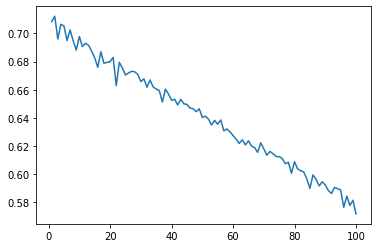

In [ ]:
def test_Part1():
    from sklearn.datasets import load_iris
    X_train, y_train = load_iris(return_X_y=True)
    X_train, X_test, y_train, y_test = train_test_split(X_train[50:],y_train[50:],test_size=0.2, random_state=1)

    for i in range(80):
        if y_train[i]==1:
            y_train[i]=-1
        else:
            y_train[i]=1
    for j in range(20):
        if y_test[j]==1:
            y_test[j]=-1
        else:
            y_test[j]=1

    err,w=fit_NeuralNetwork(X_train,y_train,1e-2,[30, 10],100)

    plotErr(err,100)

    cM=confMatrix(X_test,y_test,w)

    sciKit=test_SciKit(X_train, X_test, y_train, y_test)

    print("Confusion Matrix is from Part 1a is: ",cM)
    print("Confusion Matrix from Part 1b is:",sciKit)

test_Part1()
